In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Data Loading AND  Preprocessing

In [33]:
df1 = pd.read_csv("diabetes_data.csv") # biological data
df2 = pd.read_csv("dpwh.csv")       # Inidan diabetes data
df3 = pd.read_csv("funds_realsed_by_goverment_2.0.csv")  # goverment fund released 
df4 = pd.read_csv("gov_cells_2.0.csv")   # goverment Clinics and small hospitals  

In [3]:
df1.head(2)   

,Genetic Markers,Autoantibodies,Glucose_levels,Environmental_Factors,Insulin_Levels,Age,BMI,Physical_Activity,Dietary_Habits,Blood_Pressure,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid_Use_History,Genetic Testing,Neurological Assessments,Liver_Function_Tests,Digestive_Enzyme_Levels,Urine_Test,Birth_Weight,Early_Onset_Symptoms
0,Positive,Negative,No,Present,40,44,38,High,Healthy,124,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Positive,Negative,No,Present,13,1,17,High,Healthy,73,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes


In [4]:
df2.head(2)

,State,patients_with_symptoms_Public,patients_with_symptoms_Private,patients_with_symptoms_Total,diagnosed_patients_Public,diagnosed_patients_Private,diagnosed_patients_Public_Total,Patients_on_Anti_diabetic_treatment_Public,Patients_on_Anti_diabetic_treatment_Private,Patients_on_Anti_diabetic_treatment_total
0,Andaman & Nicobar Islands,518,3,521,97,1,98,69,1,70
1,Andhra Pradesh,65235,26883,92118,8816,2940,11756,6282,1671,7953


In [5]:
df3.head(2)

,S_No,State,2012_2013,2013_2014,2014_2015,2015_2016_running
0,1,Andhra Pradesh,0,0,561,0
1,2,Assam,0,1714,579,3333


In [6]:
df4.head(2)

,S_No,State,State_cells,District_Cell,District_Clinic,Critical_Care_Unit,Community_Health_Center_Clinic,number_of_Day_Care_Center
0,1,Andhra Pradesh,1,2,9,7,62,0
1,2,Arunachal Pradesh,1,17,17,0,20,0


# Cleaning and Merging Datasets 

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Genetic Markers               1000 non-null   object
 1   Autoantibodies                1000 non-null   object
 2   Glucose_levels                1000 non-null   object
 3   Environmental_Factors         1000 non-null   object
 4   Insulin_Levels                1000 non-null   int64 
 5   Age                           1000 non-null   int64 
 6   BMI                           1000 non-null   int64 
 7   Physical_Activity             1000 non-null   object
 8   Dietary_Habits                1000 non-null   object
 9   Blood_Pressure                1000 non-null   int64 
 10  Cholesterol_Levels            1000 non-null   int64 
 11  Waist_Circumference           1000 non-null   int64 
 12  Blood_Glucose_Levels          1000 non-null   int64 
 13  Ethnicity          

In [34]:
# checking if there is any age below zero    (Anomalies)
df1.loc[df1["Age"]<1,].head(2)

,Genetic Markers,Autoantibodies,Glucose_levels,Environmental_Factors,Insulin_Levels,Age,BMI,Physical_Activity,Dietary_Habits,Blood_Pressure,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid_Use_History,Genetic Testing,Neurological Assessments,Liver_Function_Tests,Digestive_Enzyme_Levels,Urine_Test,Birth_Weight,Early_Onset_Symptoms
13,Positive,Positive,No,Present,9,0,19,Low,Unhealthy,71,...,56,No,Yes,Negative,1,Normal,29,Glucose Present,2202,No
31,Positive,Negative,No,Present,11,0,18,Moderate,Unhealthy,79,...,73,No,No,Positive,2,Normal,25,Glucose Present,2889,No


In [35]:
# removing zero age column from data
df1 = df1[df1['Age'] != 0]

Merging Dataset Through a Common Column (state)

In [36]:
# List of DataFrames to merge
dataframes = [df2, df3, df4]

# Initialize merged_df as an empty DataFrame
merged_df = pd.DataFrame()

# Merge all DataFrames in the list
for df in dataframes:
    if merged_df.empty:
        merged_df = df  # Start with the first DataFrame
    else:
        merged_df = pd.merge(merged_df, df, on='State', how='outer')

# Display the merged DataFrame
print(merged_df)

                                       State  patients_with_symptoms_Public  \
0                  Andaman & Nicobar Islands                          518.0   
1                             Andhra Pradesh                        65235.0   
2                          Arunachal Pradesh                         2378.0   
3                                      Assam                        34011.0   
4                                      Bihar                        53768.0   
5                                 Chandigarh                         3531.0   
6                               Chhattisgarh                        26987.0   
7   Dadra and Nagar Haveli and Daman and Diu                          838.0   
8                                      Delhi                        65700.0   
9                                        Goa                         1659.0   
10                                   Gujarat                       106333.0   
11                                   Haryana        

In [11]:
merged_df.head(2)

,State,patients_with_symptoms_Public,patients_with_symptoms_Private,patients_with_symptoms_Total,diagnosed_patients_Public,diagnosed_patients_Private,diagnosed_patients_Public_Total,Patients_on_Anti_diabetic_treatment_Public,Patients_on_Anti_diabetic_treatment_Private,Patients_on_Anti_diabetic_treatment_total,...,2013_2014,2014_2015,2015_2016_running,S_No_y,State_cells,District_Cell,District_Clinic,Critical_Care_Unit,Community_Health_Center_Clinic,number_of_Day_Care_Center
0,Andaman & Nicobar Islands,518.0,3.0,521.0,97.0,1.0,98.0,69.0,1.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,65235.0,26883.0,92118.0,8816.0,2940.0,11756.0,6282.0,1671.0,7953.0,...,0.0,561.0,0.0,1.0,1.0,2.0,9.0,7.0,62.0,0.0


# Exploratory Data Analysis (EDA)

            creating a column which stores the diabetic and non diabtic patients 

In [37]:
# diabetes outcome based on medical thresholds
df1['Outcome'] = np.where(
    (df1['Blood_Glucose_Levels'] >= 126) |  (df1['BMI'] >= 30) | (df1['Insulin_Levels'] > 150), 
    1,  # Diabetic
    0   # Non-Diabetic 
)

# Check data distribution
print(df1['Outcome'].value_counts())

Outcome
1    666
0    295
Name: count, dtype: int64


                                  state with most diabetic patients

In [38]:
# storing values for graph in variable a 
a = merged_df.groupby(["State"])[["diagnosed_patients_Public_Total"]].sum()
a = a.reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


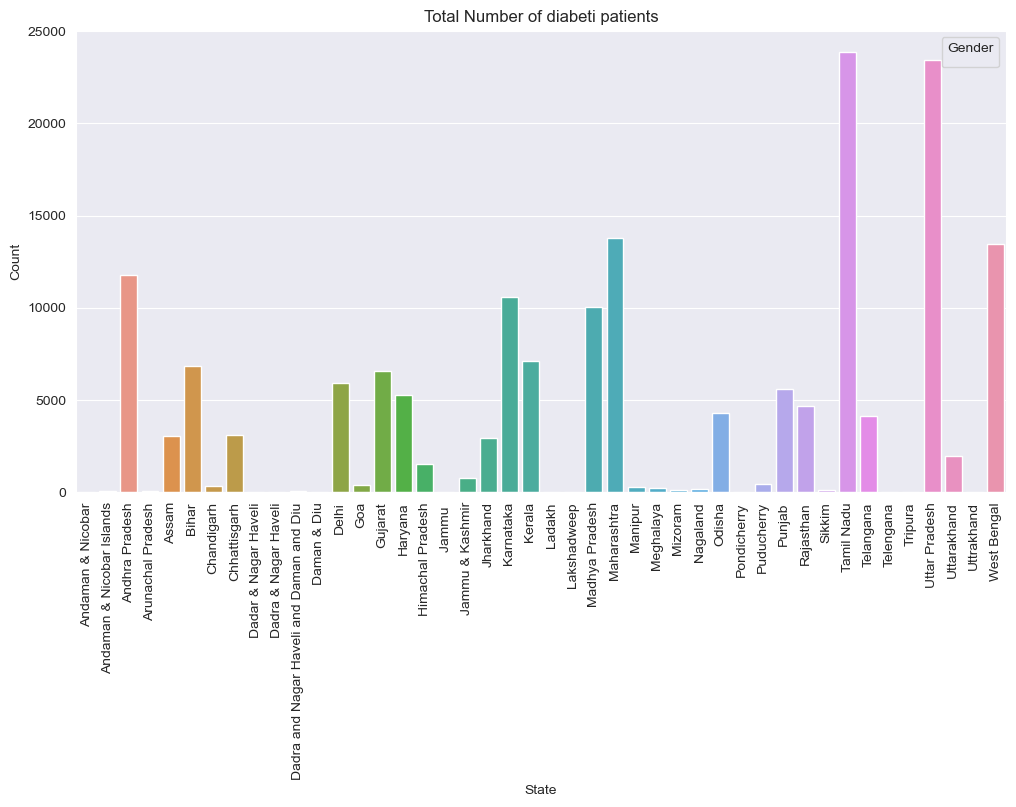

In [39]:
# ploting the graph 
plt.figure(figsize=(12, 6))
a_melted = a.melt(id_vars="State",  value_name="sum")

sns.barplot(x="State", y="sum", data=a_melted)
plt.xticks(rotation=90)
plt.title("Total Number of diabeti patients")
plt.ylabel("Count")
plt.xlabel("State")
plt.legend(title="Gender")
plt.show()

We got our first insight and its a very wow thing that our south india have most number of diabetes 
patients in hospital. In which tamil nadu , Uttarpardesh and west bengal have highest numbers 

                           symptoms vs diagnosed vs treated diabetic patients 

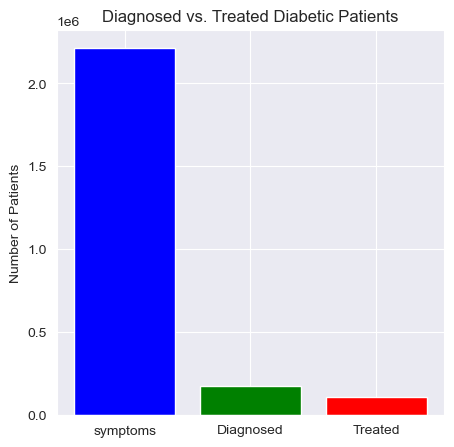

In [40]:
# Calculate totals
symptoms_total = merged_df["patients_with_symptoms_Total"].sum()
diagnosed_total = merged_df["diagnosed_patients_Public_Total"].sum()
treated_total = merged_df["Patients_on_Anti_diabetic_treatment_total"].sum()

# Create a bar plot
plt.figure(figsize=(5, 5))
plt.bar(
    ["symptoms","Diagnosed", "Treated"],
    [symptoms_total, diagnosed_total, treated_total],
    color=["blue", "green","Red"]
)
plt.title("Diagnosed vs. Treated Diabetic Patients")
plt.ylabel("Number of Patients")
plt.show()

Here we got to know that most of the indian who have symptoms are not even diagnosed and its a huge number grap betweenthe symptoms and diagnosed people and diagnosed one are treated well .

In [41]:
# checking all the numbers for heatmap 
new_df.corr()

,Insulin_Levels,BMI,Blood_Pressure,Cholesterol_Levels,Digestive_Enzyme_Levels
Insulin_Levels,1.000000,0.829049,0.893569,0.874231,0.758365
BMI,0.829049,1.000000,0.889865,0.875331,0.838643
Blood_Pressure,0.893569,0.889865,1.000000,0.930501,0.831856
Cholesterol_Levels,0.874231,0.875331,0.930501,1.000000,0.811665
Digestive_Enzyme_Levels,0.758365,0.838643,0.831856,0.811665,1.000000


<Figure size 600x400 with 0 Axes>

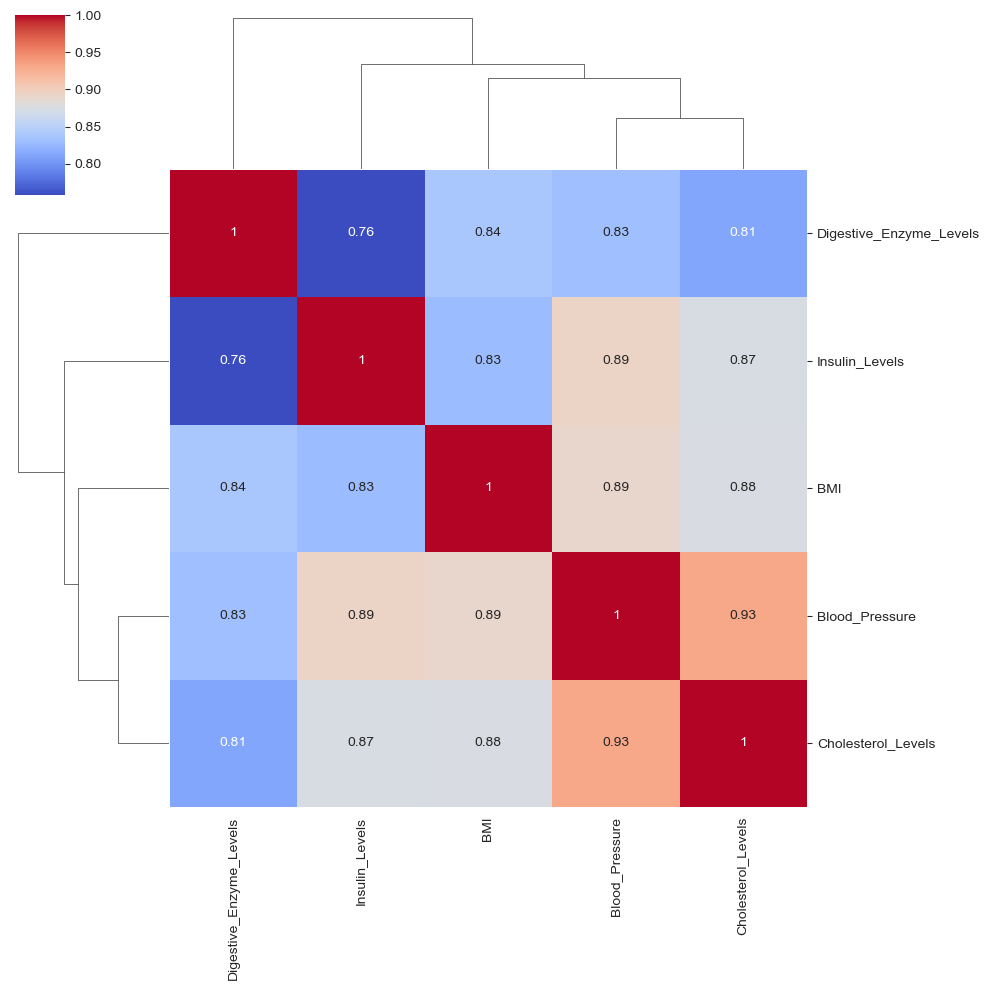

In [42]:
# ploting a small heatmap 
plt.figure(figsize=(6, 4))  
sns.clustermap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

here we got to know that most of the blood measure are not so co realated and we can use multiple algo
models for the prediction , Anyways Cholesterol_Levels and blood pressure are the top co realated features in data .

                             co-realtion between other diabetic value

In [43]:
# converting string value with numarical values 0 & 1 
# Create a copy of the DataFram
df1_dash = df1[["Autoantibodies", "Glucose_levels", "Environmental_Factors","Insulin_Levels", "BMI" ,"Age","Blood_Glucose_Levels", 
                "Blood_Pressure" , "Cholesterol_Levels" , "Digestive_Enzyme_Levels",
                               "Pancreatic_Health", "Physical_Activity", "Dietary_Habits", "Smoking_Status",
                                "Glucose_Tolerance_Test", "Liver_Function_Tests", "Urine_Test",
                                "Early_Onset_Symptoms","Alcohol_Consumption" ,"Outcome"]].copy()

# Define mappings for each column
mappings = {
    "Autoantibodies": {'Negative': 1, 'Positive': 0},
    "Glucose_levels": {'No': 1, 'Yes': 0},
    "Environmental_Factors": {'Absent': 1, 'Present': 0},
    "Physical_Activity": {'Low': 1, 'High': 0 , 'Moderate':2},
    "Dietary_Habits": {'Unhealthy': 1, 'Healthy': 0},
    "Smoking_Status": {'Smoker': 1, 'Non-Smoker': 0},
    "Glucose_Tolerance_Test": {'Abnormal': 1, 'Normal': 0},
    "Liver_Function_Tests": {'Abnormal': 1, 'Normal': 0},
    "Urine_Test": {'Ketones Present': 1, 'Normal': 0 , 'Glucose Present' : 2 , 'Protein Present' : 3},
    "Early_Onset_Symptoms": {'No': 1, 'Yes': 0},
    "Alcohol_Consumption" : {"High":0 , "Low": 1 ,"Moderate":2 }
}

# Apply mappings to each column
for column, mapping in mappings.items():           # column = "Autoantibodies" ,  mapping = {'Negative': 1, 'Positive': 0}
    df1_dash[column] = df1_dash[column].map(mapping)   # same as above but for every column and mapping 

# Print the updated DataFrame
print(df1_dash)

     Autoantibodies  Glucose_levels  Environmental_Factors  Insulin_Levels  \
0                 1               1                      0              40   
1                 1               1                      0              13   
2                 0               0                      0              27   
3                 0               1                      0               8   
4                 1               0                      0              17   
..              ...             ...                    ...             ...   
995               1               1                      0              18   
996               1               0                      0              29   
997               1               1                      1              32   
998               0               0                      1              38   
999               0               0                      1               7   

     BMI  Age  Blood_Glucose_Levels  Blood_Pressure  Cholestero

In [44]:
# checking the value again for big heat map
df1_dash.corr()

,Autoantibodies,Glucose_levels,Environmental_Factors,Insulin_Levels,BMI,Age,Blood_Glucose_Levels,Blood_Pressure,Cholesterol_Levels,Digestive_Enzyme_Levels,Pancreatic_Health,Physical_Activity,Dietary_Habits,Smoking_Status,Glucose_Tolerance_Test,Liver_Function_Tests,Urine_Test,Early_Onset_Symptoms,Alcohol_Consumption,Outcome
Autoantibodies,1.000000,-0.036193,-0.014376,0.033328,-0.020252,-0.016508,0.039090,-0.027975,-0.009896,-0.018549,-0.064766,0.001220,-0.012640,-0.044729,0.041948,0.002725,-0.008544,-0.024310,-0.031319,0.007066
Glucose_levels,-0.036193,1.000000,0.004941,-0.020215,-0.068408,-0.045559,0.029239,-0.008282,-0.052582,-0.019719,-0.073302,-0.025620,0.005456,-0.013133,0.034508,-0.003482,-0.030376,0.031929,0.059944,0.028994
Environmental_Factors,-0.014376,0.004941,1.000000,-0.026600,-0.063637,-0.047677,-0.016455,-0.058443,-0.038833,0.010657,-0.025380,0.006319,0.077310,0.034422,0.001838,0.036789,-0.031794,-0.015415,0.015931,-0.053604
Insulin_Levels,0.033328,-0.020215,-0.026600,1.000000,0.513663,0.609937,0.095365,0.574031,0.541310,0.392889,0.225834,0.034360,0.007844,-0.025210,0.020052,0.030088,0.043239,0.083996,0.012336,0.169567
BMI,-0.020252,-0.068408,-0.063637,0.513663,1.000000,0.636995,-0.095224,0.614120,0.598468,0.506530,0.342399,0.043760,-0.070042,-0.053824,0.001423,0.010401,0.036260,0.090953,-0.025167,0.101940
Age,-0.016508,-0.045559,-0.047677,0.609937,0.636995,1.000000,0.019273,0.734433,0.720172,0.547597,0.378886,0.032221,-0.014316,-0.013055,0.013173,-0.002124,0.010100,0.076322,0.014869,0.096440
Blood_Glucose_Levels,0.039090,0.029239,-0.016455,0.095365,-0.095224,0.019273,1.000000,-0.011580,-0.062717,-0.340125,-0.373878,-0.013341,0.021223,-0.008779,0.043347,-0.036710,-0.017623,-0.002197,0.032735,0.665816
Blood_Pressure,-0.027975,-0.008282,-0.058443,0.574031,0.614120,0.734433,-0.011580,1.000000,0.663956,0.536514,0.334867,0.011688,-0.017905,0.002050,0.041181,-0.020947,0.033995,0.045081,-0.004638,0.063034
Cholesterol_Levels,-0.009896,-0.052582,-0.038833,0.541310,0.598468,0.720172,-0.062717,0.663956,1.000000,0.559226,0.382184,0.052986,-0.020549,0.000689,0.004688,-0.019279,0.053928,-0.002727,-0.003803,0.089952
Digestive_Enzyme_Levels,-0.018549,-0.019719,0.010657,0.392889,0.506530,0.547597,-0.340125,0.536514,0.559226,1.000000,0.448280,-0.006493,-0.061058,-0.002947,-0.011579,0.021279,0.031765,0.029625,-0.018590,-0.173096


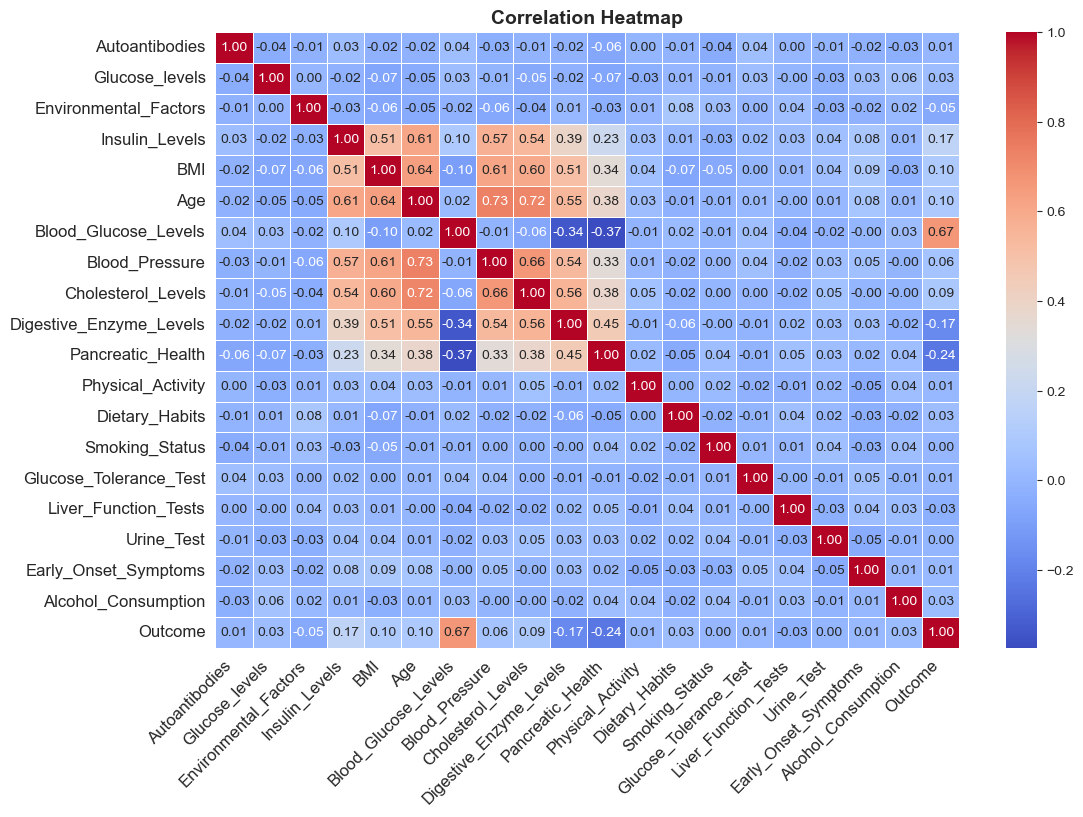

In [45]:
# Compute correlation matrix
corr_matrix = df1_dash.corr()


# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, 
         
            cmap="coolwarm",  # Better color contrast
            annot=True,  # Show correlation values
            fmt=".2f",  # Limit decimal places to 2
            linewidths=0.5,  # Add grid lines for clarity
            cbar=True,  # Show color bar
            annot_kws={"size": 10})  # Adjust font size

# Improve readability
plt.xticks(rotation=45, ha="right", fontsize=12)  
plt.yticks(fontsize=12)  
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold") 
plt.show()

Now we are sure that our diabetic data is not so much co related , but here is the insights - blood glucose level are not related with anything and age , BMI , BP is most co related with insuline levels that means with the change of age and  bmi , BP will also change.  

                               Distribution of different biological levels 

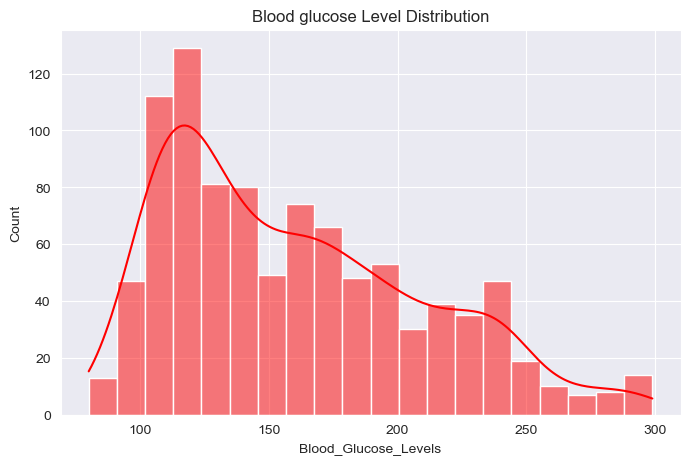

In [46]:
# Distribution of glucose Levels
plt.figure(figsize=(8,5))
sns.histplot(df1['Blood_Glucose_Levels'], bins=20, kde=True, color='red')
plt.title("Blood glucose Level Distribution")
plt.show()

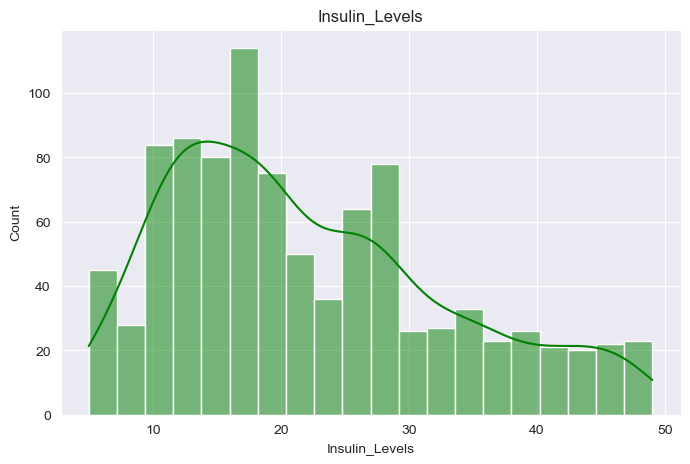

In [47]:
# Distribution of Insulin_Levels
plt.figure(figsize=(8,5))
sns.histplot(df1['Insulin_Levels'], bins=20, kde=True, color='green')
plt.title("Insulin_Levels")
plt.show()

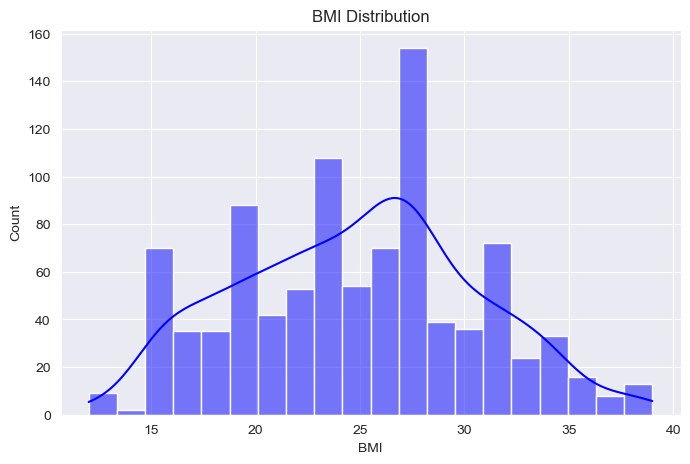

In [48]:
# Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(df1['BMI'], bins=20, kde=True, color='Blue')
plt.title("BMI Distribution")
plt.show()

most of the people have high BMI with insuline and glucose levels (main cause of diabetes)

                             diabetic and non diabetic population 

In [49]:
# converting the number into diabetic and non diabetic 
df1['Outcome'] = np.where(df1['Outcome'] == 1, "Diabetic", "Non-Diabetic")

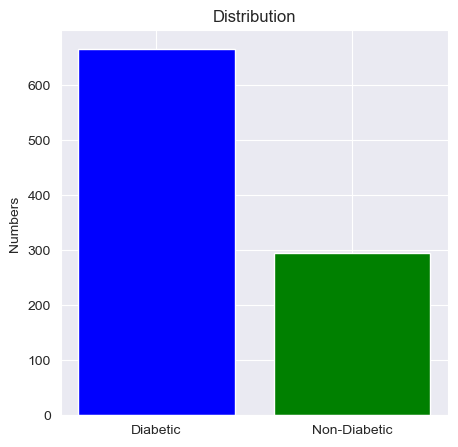

In [50]:
# Distribution of diabetic and non diabetic population 
x = df1['Outcome'].value_counts()
x.index,x.values

plt.figure(figsize=(5,5))
plt.bar(x.index,x.values,color=["blue","green"])
plt.title('Distribution')
plt.ylabel('Numbers ')
plt.show()

as we predicted , Most of the population is diabetic due to high level of BGL and BMI

                        diabetic and non-diabetic blood levels

In [51]:
st = df1.groupby("Outcome")[["Insulin_Levels", "BMI" , 
                         "Blood_Pressure" , "Cholesterol_Levels" , "Blood_Glucose_Levels"]].mean()
st.head(2)

,Insulin_Levels,BMI,Blood_Pressure,Cholesterol_Levels,Blood_Glucose_Levels
Outcome,,,,,
Diabetic,23.351351,25.253754,113.478979,199.268769,182.324324
Non-Diabetic,19.355932,23.996610,110.935593,190.538983,110.318644


There is not significant difference between blood levels except BGL , there is huge difference between 
Blood_Glucose_Levels of Diabetic and Non-Diabetic people 

                                  Age trend in diabetes 

In [52]:
# making copy of data  
df1_copy = df1.copy()

In [53]:
# changing the type 
df1_copy['Outcome'] = df1_copy['Outcome'].map({'Diabetic': 1, 'Non-Diabetic': 0})

In [54]:
# Initialize empty column (use the same DataFrame consistently)
df1_copy["Age group"] = ""

# Assign values based on corrected conditions (no overlaps, clear boundaries)
df1_copy.loc[df1["Age"] < 10, "Age group"] = "Child"
df1_copy.loc[(df1["Age"] >= 10) & (df1["Age"] < 18), "Age group"] = "Teenager"
df1_copy.loc[(df1["Age"] >= 18) & (df1["Age"] < 25), "Age group"] = "Young"
df1_copy.loc[(df1["Age"] >= 25) & (df1["Age"] < 40), "Age group"] = "Adult"
df1_copy.loc[(df1["Age"] >= 40) & (df1["Age"] < 50), "Age group"] = "Middle-aged"
df1_copy.loc[df1["Age"] >= 50, "Age group"] = "Senior"

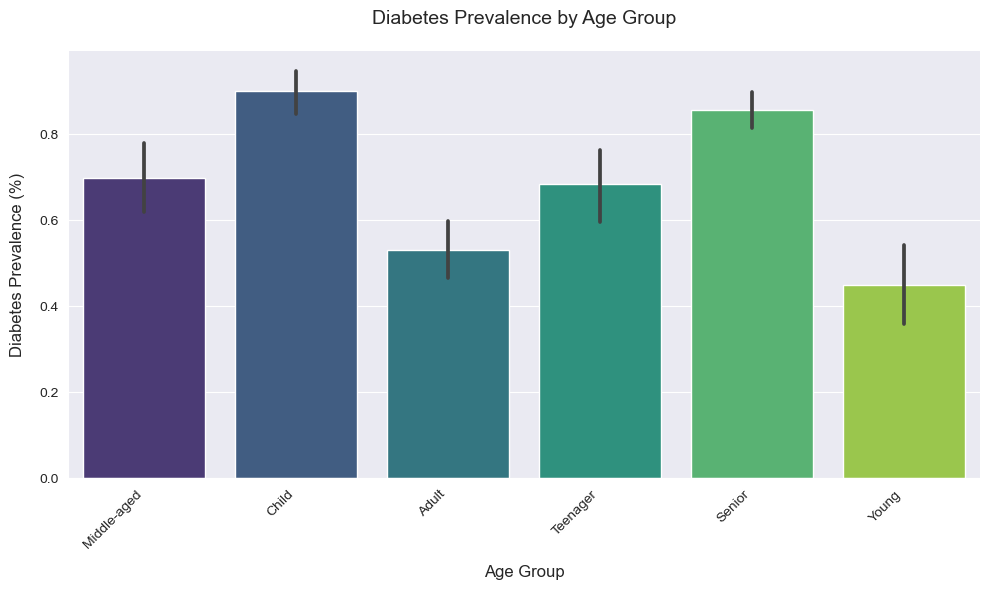

In [55]:
# Plotting with improved aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x="Age group", y="Outcome", data=df1_copy, palette="viridis")
plt.xticks(rotation=45, ha='right')  # Better readability for tilted labels
plt.xlabel("Age Group", fontsize=12, labelpad=10)
plt.ylabel("Diabetes Prevalence (%)", fontsize=12, labelpad=10)
plt.title("Diabetes Prevalence by Age Group", fontsize=14, pad=20)
sns.despine()
plt.tight_layout()  # Prevents label cutoff
plt.show()

Most of the people diabetic people are either child or senior , note that there is no big difference between other age group people. and young peoples are most non- diabetic

# Machine Learning 

                                Diabetes Risk Score card 

In [56]:
# making a list of features 
features = ['BMI', 'Blood_Glucose_Levels', 'Age']
df_risk = df1[features] 

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
df_risk_scaled = pd.DataFrame(scaler.fit_transform(df_risk), columns=features)

# priotize which is more important  (Adjust as needed)
weights = {'Blood_Glucose_Levels': 0.5, 'BMI': 0.3, 'Age': 0.2}

# Compute Diabetes Risk Score
df1['Diabetes_Risk_Score'] = (
    df_risk_scaled['Blood_Glucose_Levels'] * weights['Blood_Glucose_Levels'] +
    df_risk_scaled['BMI'] * weights['BMI'] +
    df_risk_scaled['Age'] * weights['Age']
)

# Classify Risk Levels
def classify_risk(score):
    if score >= 0.7:
        return "High Risk"
    elif score >= 0.4:
        return "Moderate Risk"
    else:
        return "Low Risk"

df1['Risk_Level'] = df1['Diabetes_Risk_Score'].apply(classify_risk)

# Display the first few rows with the new feature
print(df1[['BMI', 'Blood_Glucose_Levels', 'Age', 'Diabetes_Risk_Score', 'Risk_Level']].head())

   BMI  Blood_Glucose_Levels  Age  Diabetes_Risk_Score     Risk_Level
0   38                   168   44             0.600059  Moderate Risk
1   17                   178    1             0.279300       Low Risk
2   24                   105   36             0.280155       Low Risk
3   16                   121    7             0.153436       Low Risk
4   17                   289   10             0.555801  Moderate Risk


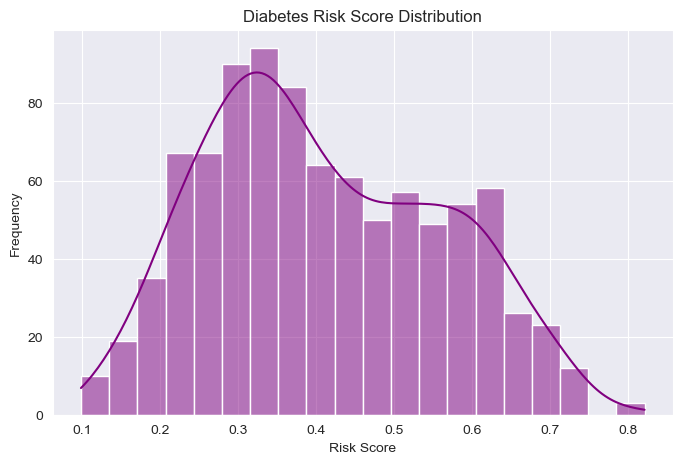

In [57]:
# Plot Distribution of Diabetes Risk Score
plt.figure(figsize=(8,5))
sns.histplot(df1['Diabetes_Risk_Score'], bins=20, kde=True, color='purple')
plt.title("Diabetes Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.show()

most of the people are in risk of diabetes in this data 

              blood mesures that are the most significant reason to cause diabetes

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# creating variabe to store all the blood measure  
features = ['Blood_Glucose_Levels', 'BMI', 'Age', 'Blood_Pressure', 'Insulin_Levels']
X = df1_copy[features]
y = df1_copy['Outcome']  # Assuming 'Outcome' is the diabetes label (0 = No, 1 = Yes)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)

# Display feature importance
print(importances)

                Feature  Importance
0  Blood_Glucose_Levels    0.773550
1                   BMI    0.127468
3        Blood_Pressure    0.044734
4        Insulin_Levels    0.027735
2                   Age    0.026514


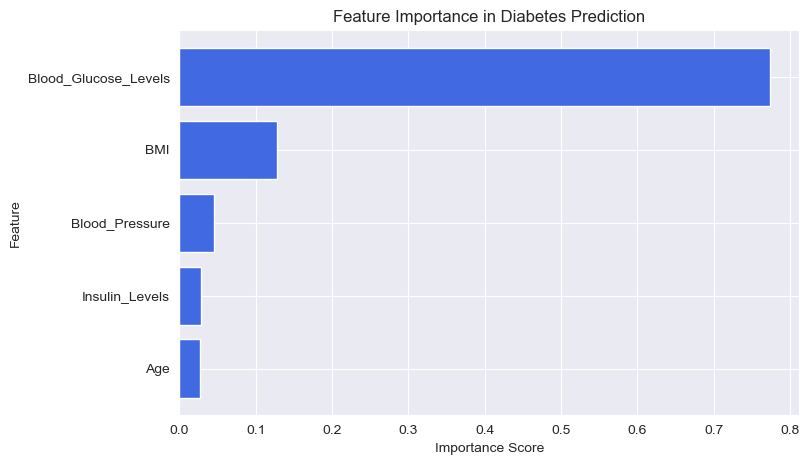

In [61]:
# ploting the feature 
plt.figure(figsize=(8, 5))
plt.barh(importances['Feature'], importances['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Diabetes Prediction")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# Prediction of diabetes with multiple  Model training 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# using co realtion dataset in which we converted every possible  column into 0 and 1
df1_dash.head(2)

,Autoantibodies,Glucose_levels,Environmental_Factors,Insulin_Levels,BMI,Age,Blood_Glucose_Levels,Blood_Pressure,Cholesterol_Levels,Digestive_Enzyme_Levels,Pancreatic_Health,Physical_Activity,Dietary_Habits,Smoking_Status,Glucose_Tolerance_Test,Liver_Function_Tests,Urine_Test,Early_Onset_Symptoms,Alcohol_Consumption,Outcome
0,1,1,0,40,38,44,168,124,201,56,36,0,0,1,0,0,1,1,0,1
1,1,1,0,13,17,1,178,73,121,28,26,0,0,0,0,0,2,0,2,1


In [64]:
# Load dataset 
X = df1_dash.drop('Outcome', axis=1)  # Features (glucose, BMI, age, etc.)
y = df1_dash['Outcome']  # Target (1=diabetic, 0=non-diabetic)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                             Logistic Regression model 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [66]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

Logistic Regression Accuracy: 0.96
F1-Score: 0.97


                                      Decision Tree model   

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}") 
print("overfitted")

Decision Tree Accuracy: 1.00
overfitted


dealing with overfitting 

In [69]:
# dealing with overfitting 
dt = DecisionTreeClassifier(
    max_depth=3,           # Limit tree depth
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=10,   # Minimum samples in a leaf
    max_features=4,        # Limit features per split
    random_state=42
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Train Accuracy: {accuracy_score(y_train, dt.predict(X_train)):.2f}")

Decision Tree Test Accuracy: 0.95
Train Accuracy: 0.94


                                      Random Forest model 

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("overfitted")

Random Forest Accuracy: 1.00
overfitted


                                LightGBM (Gradient Boosting)

In [72]:
from lightgbm import LGBMClassifier

In [73]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Overfitted")

[LightGBM] [Info] Number of positive: 538, number of negative: 230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700521 -> initscore=0.849779
[LightGBM] [Info] Start training from score 0.849779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

                                 SVM (Support Vector Machine)

In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [77]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.2f}")

SVM Accuracy: 0.96


 now , Logistic Regression (LR) is the right model because of it's High Performance , No Overfitting 
 and  Simplicity & Speed 

# Logistic Regression Model

                                cross validation of LR 

In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print(f"LR CV Accuracy: {lr_scores.mean():.2f} (±{lr_scores.std():.2f})")

LR CV Accuracy: 0.94 (±0.01)


                              Hyperparameter Tuning of LR 

In [84]:
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import LogisticRegression

In [85]:
# Define the model
lr = LogisticRegression(solver='liblinear', max_iter=1000)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',  # You can also use 'accuracy', 'roc_auc' etc.
                           verbose=2,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 100, 'penalty': 'l1'}
Best F1 Score: 0.9507337082928068


now we got our best parameters and now we will train our model with these parameters 

                                   Evaluate Performance

In [86]:
from sklearn.metrics import classification_report

In [87]:
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        65
           1       0.95      0.98      0.97       128

    accuracy                           0.95       193
   macro avg       0.95      0.94      0.95       193
weighted avg       0.95      0.95      0.95       193



# Final model 

In [88]:
final_model = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=1000)
final_model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear')

now if you will gave your data parameters like your BMI , BGL , insuline level , you smoke or not  then this model will predict that you either you have diabetes or not , with 95% of acccuracy 

features importance 

<Axes: title={'center': 'Feature Importance'}>

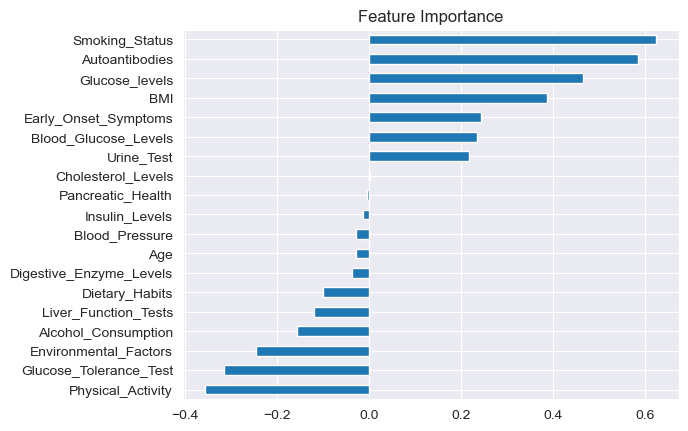

In [89]:
coeff = pd.Series(final_model.coef_[0], index=X_train.columns)
coeff.sort_values().plot(kind='barh', title='Feature Importance')

#  Exporting our model and data

In [90]:
import joblib
joblib.dump(final_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

Exporting datasets for visualization in Power BI 

In [91]:
df1.to_excel("diabetic_data.xlsx", index=False)
merged_df.to_excel("merged.xlsx", index=False)